<a href="https://colab.research.google.com/github/arfin-arif/ml/blob/main/crop_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

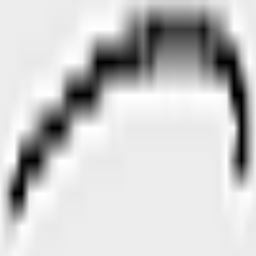

Screenshot 2023-11-13 143542.png


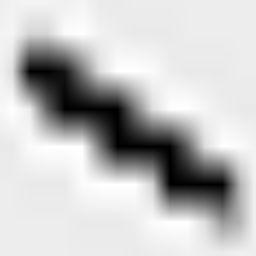

Screenshot 2023-11-13 143643.png


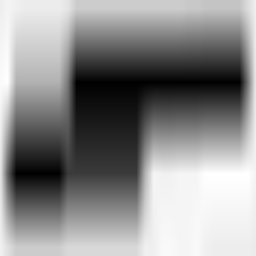

Screenshot 2023-11-13 143612.png


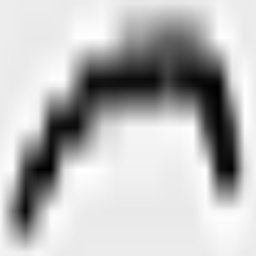

k-short.png


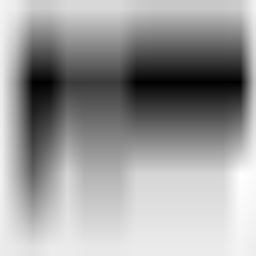

Screenshot 2023-11-13 143626.png


In [18]:



import os
import cv2
import numpy as np
from IPython.display import Image, display

def crop_and_save_images(input_folder, output_folder):

    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            # Read the original image
            img_path = os.path.join(input_folder, filename)
            original_img = cv2.imread(img_path)

            # Convert original image to RGB
            rgb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
            copy_image = rgb_img.copy()

            # Perform image processing (e.g., cropping)
            lower = np.array([0, 0, 0])
            higher = np.array([250, 250, 250])
            mask = cv2.inRange(rgb_img, lower, higher)
            cont, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            c = max(cont, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(c)
            cropped_img = copy_image[y:y + h, x:x + w]

            # Convert the cropped image to gray before saving
            gry_cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
            gry_cropped_img=cv2.resize(gry_cropped_img,(256,256))

            # Save the cropped image to the output folder
            output_img_path = os.path.join(output_folder, f"cropped_{filename}")
            cv2.imwrite(output_img_path, gry_cropped_img)

            # Display the cropped image
            display(Image(filename=output_img_path))
            print(filename)


input_folder = "/content/temp_images/shorthand"
output_folder = "/content/cropped_images"

crop_and_save_images(input_folder, output_folder)

